## Плотная упаковка равных сфер (2D-проекции)

In [1]:
import numpy as np
import scipy.linalg as la
import shapely.geometry as geo
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib import cm

#### Гранецентрированная Кубическая (ГЦК)
По оси симметрии 4-го порядка

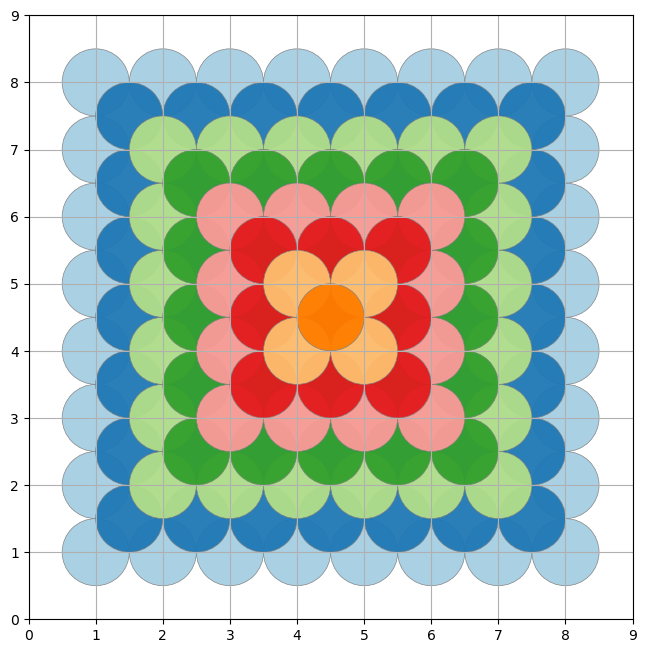

In [2]:
fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.add_subplot(projection='rectilinear')

ax.set_aspect(1)
ax.set_xbound(0,9)
ax.set_ybound(0,9)
ax.grid()

r = 0.5

for iz in np.arange(0,8):
    for iy in np.arange(0,8-iz):
        for ix in np.arange(0,8-iz):
            x = 2*r*ix + r*iz + 1
            y = 2*r*iy + r*iz + 1
            c = cm.Paired.colors[iz]
            p = pch.Circle((x,y), r, alpha=0.95, color=c, ec='gray', lw=0.5) 
            ax.add_patch(p)

plt.draw()

#### Гранецентрированная Кубическая (ГЦК)
По оси симметрии 3-го порядка

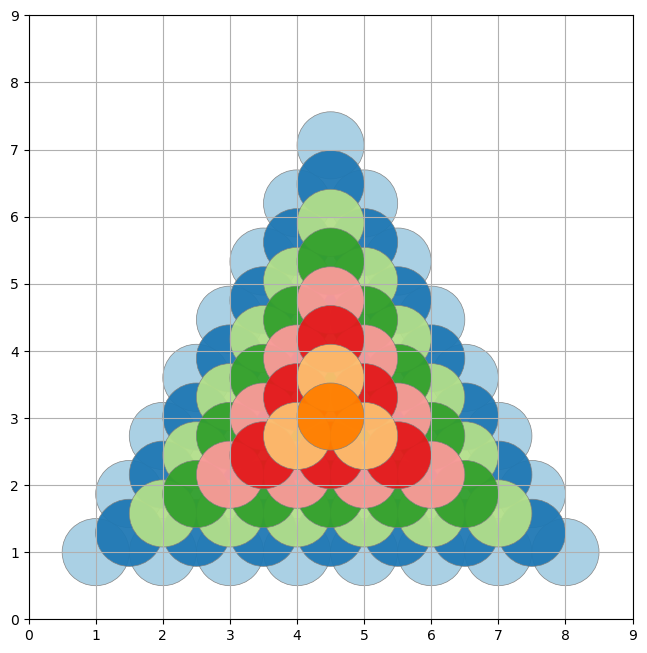

In [3]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(projection='rectilinear')

ax.set_aspect(1)
ax.set_xbound(0,9)
ax.set_ybound(0,9)
ax.grid()

r = 0.5

for iz in np.arange(0,8):
    for iy in np.arange(0,8-iz):
        for ix in np.arange(0,8-iz-iy):
            x = 2*r*ix + r*iy + r*iz + 1
            y = np.sqrt(3)*r*iy + (np.sqrt(3)/3)*r*iz + 1
            c = cm.Paired.colors[iz]
            p = pch.Circle((x,y), r, alpha=0.95, color=c, ec='gray', lw=0.5) 
            ax.add_patch(p)

plt.draw()

#### Гексагональная Плотноупакованная (ГПУ)

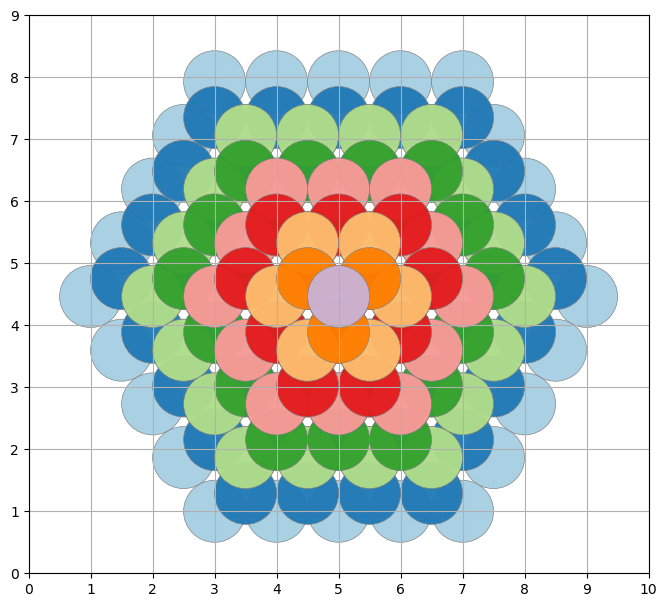

In [4]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(projection='rectilinear')

ax.set_aspect(1)
ax.set_xbound(0,10)
ax.set_ybound(0,9)
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,10,1))
ax.grid()

r = 0.5

def mk_x_coord(ix, iy, iz):
    return 2*r*ix + r*((iy+iz)%2) + 1

def mk_y_coord(ix, iy, iz):
    return np.sqrt(3)*r*iy + np.sqrt(3)/3*r*(iz%2) + 1

def create_regular_polygon(xy,v,r=1,o=0):
    angles = np.arange(0, 2*np.pi, 2*np.pi/v)
    p = [[xy[0]+r*np.cos(a+o),xy[1]+r*np.sin(a+o)] for a in angles]
    return geo.Polygon(p)

centroid = np.array([mk_x_coord(4,4,0),mk_y_coord(4,4,0)])

def is_visible(x,y,iz):
    l = 2*r*((9-iz)//2) + 1e-10
    border = create_regular_polygon(centroid, 6, l)
    return border.covers(geo.Point(x,y))

for iz in np.arange(0,9):
    for iy in np.arange(0,9):
        for ix in np.arange(0,9):
            x = mk_x_coord(ix,iy,iz)
            y = mk_y_coord(ix,iy,iz)
            c = cm.Paired.colors[iz]
            if is_visible(x,y,iz):
                p = pch.Circle((x,y), r, alpha=0.95, color=c, ec='gray', lw=0.5) 
                ax.add_patch(p)

plt.draw()